In [777]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [778]:
data = pd.read_csv("train_v9rqX0R.csv")
test_data = pd.read_csv("test_AbJTz2l.csv")

In [779]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [780]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [781]:
data.shape

(8523, 12)

In [782]:
data['Item_Weight_mea'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Item_Weight_med'] = data['Item_Weight'].fillna(data['Item_Weight'].median())
test_data['Item_Weight_mea'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Item_Weight_med'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].median())

In [783]:
def impute(df,variable):
    df[variable+"_random"] = df[variable]
    #Random Imputing
    random_state = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=101)
    random_state.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_state

In [784]:
impute(data,'Item_Weight')
impute(test_data,'Item_Weight')

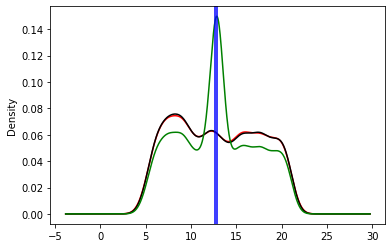

In [785]:
data['Item_Weight'].plot(kind = 'kde',color = 'Red')
data['Item_Weight_random'].plot(kind = 'kde',color = 'Black')
data['Item_Weight_mea'].plot(kind = 'kde',color = 'Green')
plt.axvline(data['Item_Weight'].mean(),color = 'blue')
plt.axvline(data['Item_Weight'].median(),color = 'blue')

In [786]:
data.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
Item_Weight_mea              0.000000
Item_Weight_med              0.000000
Item_Weight_random           0.000000
dtype: float64

In [787]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [788]:
data['Outlet_Size'] = np.where(data['Outlet_Size'].isnull(),'Null',data['Outlet_Size'])
test_data['Outlet_Size'] = np.where(test_data['Outlet_Size'].isnull(),'Null',test_data['Outlet_Size'])

In [789]:
data['Outlet_Size'].value_counts()

Medium    2793
Null      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [790]:
data.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
Item_Weight_mea              0.000000
Item_Weight_med              0.000000
Item_Weight_random           0.000000
dtype: float64

In [791]:
data['Outlet_Size'].value_counts()

Medium    2793
Null      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [792]:
data['Outlet_Size'] = data['Outlet_Size'].astype(str).str[0]
data['Outlet_Size'] = pd.get_dummies(data['Outlet_Size'],drop_first=True)
test_data['Outlet_Size'] = test_data['Outlet_Size'].astype(str).str[0]
test_data['Outlet_Size'] = pd.get_dummies(test_data['Outlet_Size'],drop_first=True)

In [793]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93


In [794]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,9.300000,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,5.920000,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700,17.500000,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800,19.200000,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052,8.930000,8.930,8.930
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,1,Tier 3,Supermarket Type2,556.6088,10.395000,10.395,10.395
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,0,Tier 3,Supermarket Type1,343.5528,13.650000,13.650,13.650
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,1,Tier 3,Supermarket Type3,4022.7636,12.857645,12.600,20.200
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,0,Tier 2,Supermarket Type1,1076.5986,16.200000,16.200,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,0,Tier 2,Supermarket Type1,4710.5350,19.200000,19.200,19.200


In [795]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mea                 0
Item_Weight_med                 0
Item_Weight_random              0
dtype: int64

In [796]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [797]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [798]:
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].astype(str).str[-1]
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].astype(int)
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].astype(str).str[-1]
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].astype(int)

In [799]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,3,Supermarket Type1,994.7052,8.93,8.93,8.93


In [800]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,0,3,Supermarket Type1,2778.3834,6.865,6.865,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,0,2,Supermarket Type1,549.2850,8.380,8.380,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,2,Supermarket Type1,1193.1136,10.600,10.600,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,1,3,Supermarket Type2,1845.5976,7.210,7.210,7.210
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,0,1,Supermarket Type1,765.6700,14.800,14.800,14.800


In [801]:
data['Outlet_Location_Type'].dtype

dtype('int32')

In [802]:
#import scipy.stats as stat
#import pylab
#def qq_plot(df,variable):
#    plt.figure(figsize = (10,6))
#    plt.subplot(1,2,1)
#    df[variable].hist()
#    plt.subplot(1,2,2)
#    stat.probplot(df[variable],dist='norm',plot=pylab)
#    plt.show()

In [803]:
#data['Item_MRP_log'] = np.log(data['Item_MRP'])
#data['Item_MRP_sqt'] = data['Item_MRP']**(1/2)
#data['Item_MRP_exp'] = data['Item_MRP']**(1/1.2)
#data['Item_MRP_boxcox'],parameters = stat.boxcox(data['Item_MRP'])
#qq_plot(data,'Item_MRP_exp')

In [804]:
#data['Item_Visibility_log'] = np.log(data['Item_Visibility']+1)
#data['Item_Visibility_sqt'] = data['Item_Visibility']**(1/2)
#data['Item_Visibility_exp'] = data['Item_Visibility']**(1/1.2)
#data['Item_Visibility_boxcox'],parameters = stat.boxcox(data['Item_Visibility'])
#qq_plot(data,'Item_Visibility_log')

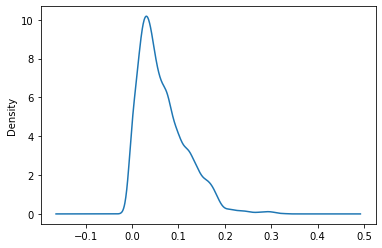

In [805]:
data['Item_Visibility'].plot(kind='kde')

In [806]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [807]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [808]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [809]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({"Low Fat":"Low Fat","Regular":"Regular","LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({"Low Fat":"Low Fat","Regular":"Regular","LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [810]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [811]:
data['Item_Fat_Content'] = pd.get_dummies(data['Item_Fat_Content'],drop_first=True)
test_data['Item_Fat_Content'] = pd.get_dummies(test_data['Item_Fat_Content'],drop_first=True)

In [812]:
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [813]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,3,Supermarket Type1,994.7052,8.93,8.93,8.93


In [814]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [815]:
data['Item_Type'] = pd.get_dummies(data['Item_Type'],drop_first=True)
test_data['Item_Type'] = pd.get_dummies(test_data['Item_Type'],drop_first=True)

In [816]:
data['Outlet_Identifier'] = data['Outlet_Identifier'].astype(str).str[4:]
test_data['Outlet_Identifier'] = test_data['Outlet_Identifier'].astype(str).str[4:]

In [817]:
data['Outlet_Identifier'].value_counts()

27    935
13    932
49    930
35    930
46    930
45    929
18    928
17    926
10    555
19    528
Name: Outlet_Identifier, dtype: int64

In [818]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.30,0,0.016047,0,249.8092,49,1999,1,1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,1,0.019278,0,48.2692,18,2009,1,3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,0,0.016760,0,141.6180,49,1999,1,1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,1,0.000000,0,182.0950,10,1998,0,3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,0,0.000000,0,53.8614,13,1987,0,3,Supermarket Type1,994.7052,8.93,8.93,8.93


In [819]:
data['Outlet_Type'] = pd.get_dummies(data['Outlet_Type'],drop_first=True)
data['Outlet_Type'] = pd.get_dummies(data['Outlet_Type'],drop_first=True)

In [820]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,9.30,0,0.016047,0,249.8092,49,1999,1,1,1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,1,0.019278,0,48.2692,18,2009,1,3,0,443.4228,5.92,5.92,5.92
2,FDN15,17.50,0,0.016760,0,141.6180,49,1999,1,1,1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,1,0.000000,0,182.0950,10,1998,0,3,0,732.3800,19.20,19.20,19.20
4,NCD19,8.93,0,0.000000,0,53.8614,13,1987,0,3,1,994.7052,8.93,8.93,8.93


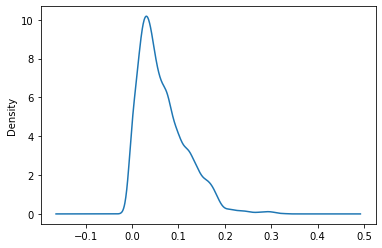

In [821]:
data['Item_Visibility'].plot(kind='kde')

In [822]:
data.drop(['Outlet_Size','Item_Weight'],axis=1,inplace = True)
test_data.drop(['Outlet_Size','Item_Weight'],axis=1,inplace = True)

In [823]:
data.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea,Item_Weight_med,Item_Weight_random
0,FDA15,0,0.016047,0,249.8092,49,1999,1,1,3735.1380,9.300000,9.300,9.300
1,DRC01,1,0.019278,0,48.2692,18,2009,3,0,443.4228,5.920000,5.920,5.920
2,FDN15,0,0.016760,0,141.6180,49,1999,1,1,2097.2700,17.500000,17.500,17.500
3,FDX07,1,0.000000,0,182.0950,10,1998,3,0,732.3800,19.200000,19.200,19.200
4,NCD19,0,0.000000,0,53.8614,13,1987,3,1,994.7052,8.930000,8.930,8.930
5,FDP36,1,0.000000,0,51.4008,18,2009,3,0,556.6088,10.395000,10.395,10.395
6,FDO10,1,0.012741,0,57.6588,13,1987,3,1,343.5528,13.650000,13.650,13.650
7,FDP10,0,0.127470,0,107.7622,27,1985,3,0,4022.7636,12.857645,12.600,20.200
8,FDH17,1,0.016687,0,96.9726,45,2002,2,1,1076.5986,16.200000,16.200,16.200
9,FDU28,1,0.094450,0,187.8214,17,2007,2,1,4710.5350,19.200000,19.200,19.200


In [824]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [825]:
import scipy.stats as stat
import pylab

In [826]:
def qq_plot(df,variable):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[variable],dist='norm',plot=pylab)
    plt.show()

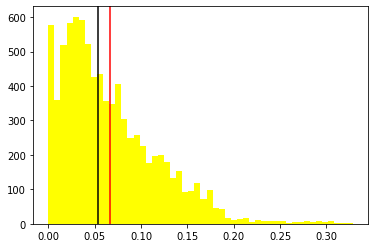

In [827]:
plt.hist(data['Item_Visibility'],bins=50,color = 'yellow')
plt.axvline(data['Item_Visibility'].median(),color = 'black')
plt.axvline(data['Item_Visibility'].mean(),color = 'red')

(array([120., 232., 197., 213., 161., 205., 155.,  58.,  19., 136., 145.,
        204., 218., 240., 246., 233., 259., 252., 235., 269., 210.,  85.,
         14., 239., 256., 251., 221., 214., 207., 205., 242., 259., 243.,
        239., 217., 194.,   4.,  68., 120.,  94., 111., 128., 131.,  82.,
        105.,  94., 106., 139., 130., 118.]),
 array([ 31.29    ,  36.001968,  40.713936,  45.425904,  50.137872,
         54.84984 ,  59.561808,  64.273776,  68.985744,  73.697712,
         78.40968 ,  83.121648,  87.833616,  92.545584,  97.257552,
        101.96952 , 106.681488, 111.393456, 116.105424, 120.817392,
        125.52936 , 130.241328, 134.953296, 139.665264, 144.377232,
        149.0892  , 153.801168, 158.513136, 163.225104, 167.937072,
        172.64904 , 177.361008, 182.072976, 186.784944, 191.496912,
        196.20888 , 200.920848, 205.632816, 210.344784, 215.056752,
        219.76872 , 224.480688, 229.192656, 233.904624, 238.616592,
        243.32856 , 248.040528, 252.752496, 25

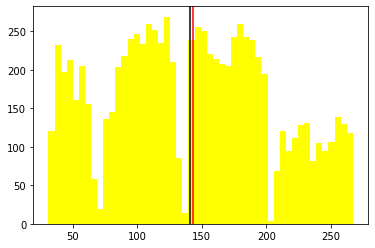

In [828]:
plt.axvline(data['Item_MRP'].median(),color = 'red')
plt.axvline(data['Item_MRP'].mean(),color = 'black')
plt.hist(data['Item_MRP'],bins=50,color = 'yellow')


In [829]:
data.drop(['Item_Type','Item_Weight_random','Item_Weight_med'],axis=1,inplace = True)
test_data.drop(['Item_Type','Item_Weight_random','Item_Weight_med'],axis=1,inplace = True)

In [830]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mea
0,FDA15,0,0.016047,249.8092,49,1999,1,1,3735.1380,9.30
1,DRC01,1,0.019278,48.2692,18,2009,3,0,443.4228,5.92
2,FDN15,0,0.016760,141.6180,49,1999,1,1,2097.2700,17.50
3,FDX07,1,0.000000,182.0950,10,1998,3,0,732.3800,19.20
4,NCD19,0,0.000000,53.8614,13,1987,3,1,994.7052,8.93


In [831]:
test_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Weight_mea
0,FDW58,0,0.007565,107.8622,49,1999,1,Supermarket Type1,20.750000
1,FDW14,1,0.038428,87.3198,17,2007,2,Supermarket Type1,8.300000
2,NCN55,0,0.099575,241.7538,10,1998,3,Grocery Store,14.600000
3,FDQ58,0,0.015388,155.0340,17,2007,2,Supermarket Type1,7.315000
4,FDY38,1,0.118599,234.2300,27,1985,3,Supermarket Type3,12.695633


In [832]:
data.shape[1]

10

In [833]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Item_Outlet_Sales','Item_Identifier',],axis=1),data['Item_Outlet_Sales'],test_size=0.4,random_state = 402)

In [834]:
from sklearn.linear_model import LinearRegression

In [835]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [836]:
X_test

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Weight_mea
6831,0,0.089188,128.9678,19,1985,1,0,12.857645
5376,1,0.065622,186.5214,35,2004,2,1,19.000000
4127,1,0.031573,99.4700,18,2009,3,0,13.650000
3981,0,0.107598,58.7904,46,1997,1,1,15.850000
1154,1,0.058543,188.3530,27,1985,3,0,12.857645
...,...,...,...,...,...,...,...,...
3390,1,0.000000,121.3098,19,1985,1,0,12.857645
5717,0,0.114246,231.2300,17,2007,2,1,21.250000
717,0,0.013421,104.8280,18,2009,3,0,16.350000
1234,0,0.027761,85.8198,45,2002,2,1,6.280000


In [837]:
y_test

6831     254.3356
5376    5275.7992
4127     299.6100
3981     585.9040
1154    4364.3190
          ...    
3390     120.5098
5717    3029.3900
717     1810.9760
1234     872.1980
6460    1677.1502
Name: Item_Outlet_Sales, Length: 3410, dtype: float64

In [838]:
lr.score(X_train,y_train)

0.4374121800670189

In [839]:
lr.score(X_test,y_test)

0.4410802255298839

In [840]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [841]:
pred = lr.predict(X_test)

In [843]:
MSE=mean_squared_error(y_test,pred)
MAE=mean_absolute_error(y_test,pred)
r2=r2_score(y_test,pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.4410802255298839
Root Mean Squared Error :  1257.2031765100683
Mean Absolute Error :  941.5292779094074
